In [44]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [45]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [46]:
NUM_CLASSES = 5

# 学習データ読み込み

In [47]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [48]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [51]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [53]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [54]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 17s 600ms/step - accuracy: 0.1484 - loss: 1.8046
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1351 - loss: 1.7349 - val_accuracy: 0.3629 - val_loss: 1.5172
Epoch 2/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2969 - loss: 1.6120
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3042 - loss: 1.5574 - val_accuracy: 0.5323 - val_loss: 1.4226
Epoch 3/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3672 - loss: 1.5126
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3875 - loss: 1.4727 - val_accuracy: 0.5998 - val_loss: 1.3477
Epoch 4/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4297 - loss: 1.4430
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [55]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9494 - loss: 0.2495


In [56]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [57]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[3.7253220e-03 9.1004485e-01 8.4434114e-02 1.7730236e-03 2.2752354e-05]
1


# 混同行列

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step


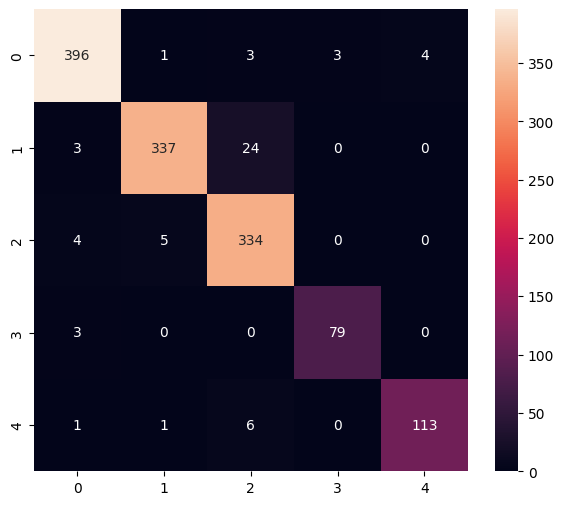

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       407
           1       0.98      0.93      0.95       364
           2       0.91      0.97      0.94       343
           3       0.96      0.96      0.96        82
           4       0.97      0.93      0.95       121

    accuracy                           0.96      1317
   macro avg       0.96      0.95      0.96      1317
weighted avg       0.96      0.96      0.96      1317



In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [59]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [60]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Ensure the model is loaded
model = tf.keras.models.load_model(model_save_path)

# Save the model in the SavedModel format
saved_model_dir = 'model/keypoint_classifier/saved_model'
model.export(saved_model_dir)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: model/keypoint_classifier/saved_model\assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/saved_model\assets


Saved artifact at 'model/keypoint_classifier/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1776081193872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776081192336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776081194640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776081193488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776081205008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776081196560: TensorSpec(shape=(), dtype=tf.resource, name=None)


6576

# 推論テスト

In [61]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [62]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [63]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [64]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [65]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.7253234e-03 9.1004479e-01 8.4434152e-02 1.7730251e-03 2.2752396e-05]
1
